<a href="https://colab.research.google.com/github/Prakface/Practice/blob/master/Using_keras_for_prediction_for_our_core_main_heuristic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1L2

In [9]:
#Importing Data

import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import math
from torch.autograd import Variable


#url='https://raw.githubusercontent.com/Prakface/Practice/master/One_mon_present_full.csv'
#url2='https://raw.githubusercontent.com/Prakface/Practice/master/Final_one_month_prev_features.csv'


#following is path data with user-IDs
url='https://raw.githubusercontent.com/Prakface/Practice/master/OneMonth_Present_Final_both_classes.csv'

url2='https://raw.githubusercontent.com/Prakface/Practice/master/OneMonthPrevFeatures2_USER_ID.csv'

url_h='https://raw.githubusercontent.com/Prakface/Practice/master/heuristic_labels.csv'

data = pd.read_csv(url) 

data2= pd.read_csv(url2)

print("Data Shape:", data.shape) 

#data=pd.read_csv(url)

df=pd.DataFrame(data)
print(data.head()) 


data_modified= data.dropna()

data_modified.to_csv("modifiedData.csv", index=False)


df2=pd.read_csv("modifiedData.csv")

print(df2[0:6])

print(df2['result'])

df_main=df2[df2.columns[~df2.columns.isin(['text', 'user_name'])]]

print(df_main.columns)

print(len(df_main.columns))

  
# X_1, y_1 means rpesent tweets' data
X_1=df_main[df_main.columns[~df_main.columns.isin(['time', 'tweet_id','result'])]] #removing result attribute as it is class label, hence we get 34 attributes
X_1=X_1.iloc[:,1:len(X_1.columns)].values   #removing the unnamed attribute
x_1=df_main[df_main.columns[~df_main.columns.isin(['time', 'tweet_id','result'])]]
x_1=x_1.iloc[:,1:len(x_1.columns)].values 
y_1=df_main.loc[:, ['result']].values


print(type(X_1), type(y_1), type(x_1), type(y_1))

print(X_1.shape)
print(y_1.shape)




print("\n the following is for previous data sets")


data2= pd.read_csv(url2)

print("Data Shape:", data2.shape) 

#data=pd.read_csv(url)

df_prev=pd.DataFrame(data2)
print(data2.head()) 


data2_modified= data2.dropna()

data2_modified.to_csv("modifiedData2.csv", index=False)


df_2=pd.read_csv("modifiedData2.csv")

print(df_2[0:6])

print(df_2['result'])

df_main2=df_2[df_2.columns[~df_2.columns.isin(['text', 'user_name'])]]

print(df_main2.columns)

print(len(df_main2.columns))

  

X_2=df_main2[df_main2.columns[~df_main2.columns.isin(['time', 'tweet_id','result'])]] #removing result attribute as it is class label, hence we get 34 attributes
X_2=X_2.iloc[:,1:len(X_2.columns)].values   #removing the unnamed attribute
x_2=df_main2[df_main2.columns[~df_main2.columns.isin(['time', 'tweet_id','result'])]]
x_2=x_2.iloc[:,1:len(x_2.columns)].values 
y_2=df_main2.loc[:, ['result']].values


print(type(X_2), type(y_2), type(x_2), type(y_2))

print(X_2.shape)
print(y_2.shape)

Data Shape: (1879, 40)
     Users_ID cat1  cat10  ...      tweet_id  url      user_name
0   205281515    0      0  ...  8.323790e+17  0.0  THEJEROMEOWEN
1   571989630    0      0  ...  8.323786e+17  0.0       Acejinjo
2   469678667    0      0  ...  8.323780e+17  0.0     RabRakha21
3  2858633976    0      0  ...  8.323777e+17  0.0       RS_Aloha
4   955893199    0      0  ...  8.323767e+17  0.0  preciselyizzy

[5 rows x 40 columns]
     Users_ID  cat1  cat10  ...      tweet_id  url        user_name
0   205281515     0      0  ...  8.323790e+17  0.0    THEJEROMEOWEN
1   571989630     0      0  ...  8.323786e+17  0.0         Acejinjo
2   469678667     0      0  ...  8.323780e+17  0.0       RabRakha21
3  2858633976     0      0  ...  8.323777e+17  0.0         RS_Aloha
4   955893199     0      0  ...  8.323767e+17  0.0    preciselyizzy
5   115498371     0      0  ...  8.323759e+17  0.0  thefireistarted

[6 rows x 40 columns]
0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
     

In [5]:
#computing the labels as per our core model (label of previous tweet = present tweet)

##Heuristic 1 -> label of the tweet that is less than 2 minutes from present tweet is same as label of present tweet
heuristic_main=[]

#our_heuristics
temp_result=[]
users=[]
userIDS=[]
twee_ids=[]
texts=[]
times=[]

 
for i in range(len(df_2['Users_ID'])):
  userIDS.append(df_2['Users_ID'][i])
  users.append(df_2['user_name'])
  temp_result.append(df_2['result'][i])
  twee_ids.append(df_2['tweet_id'][i])
  texts.append(df_2['text'][i])
  times.append(df_2['time'][i])
  
  
  
heuristic_res1=[]


for i in range(len(df_2['Users_ID'])):
  heuristic_main.append(0)

for i in range(len(df_main['Users_ID'])):
  for j in range(len(df_2['Users_ID'])):
    check_count=0
    #checking for match
    if(check_count==2):
      continue
    elif (check_count<2 and df_main['Users_ID'][i]==userIDS[j]):
      t1=df_main['time'][i]
      heuristic_main[j]=df_main['result'][i]
      '''
      check_count+=1
      dt_obj=datetime.strptime(t1, '%d-%b-%Y (%H:%M:%S.%f)')
      t2=times[j]#df2 ,previous tweets
      dt_obj2=datetime.strptime(t2, '%d-%b-%Y (%H:%M:%S.%f)')
      
      # heuristic condition and populating labels
      if(dt_obj.day==dt_obj2.day and dt_obj.month==dt_obj2.month and dt_obj.year==dt_obj2.year):
        if(dt_obj.hour==dt_obj2.hour and dt_obj2.minute-dt_obj.minute<=2):
          heuristic_main[j]=df_main['result'][i]
        elif(abs(dt_obj.hour-dt_obj2.hour)==1 and (dt_obj2.minute-dt_obj.minute)%60<=2):
          heuristic_res1_1[j]=df_main['result'][i]
        else:
          heuristic_res1_1[j]=1-df_main['result'][i]
      else:
        heuristic_res1_1[j]=1-df_main['result'][i]
   
    '''   
          
    
print(len(heuristic_main))


#print(df_main['result'][900], "\n", heuristic_res1[900:905])


c0=0
c1=0
for i in heuristic_main:
  if(i==0):
    c0+=1
  else:
    c1+=1

print("\n c0= ",c0,"\n c1= ",c1)
    


3273

 c0=  1715 
 c1=  1558


In [10]:
#tem_core_y=np.concatenate((y, heuristic_main),axis=0)
print(type(heuristic_main))

heuristic_main=np.array(heuristic_main)

print(type(heuristic_main))
print(heuristic_main.size)

df_core = pd.DataFrame(list(heuristic_main), columns =['heuristic_main'])

heu_main=df_core.loc[:, ['heuristic_main']].values
print(type(heu_main))
print(heu_main.size)

tem_main_y=np.concatenate((y_1,heu_main), axis=0)
print("\n size of tem_main_y = ", tem_main_y.size)
#print(y[1:6])
#tem_core_y=np.concatenate((y, heuristic_main),axis=0)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
3273
<class 'numpy.ndarray'>
3273

 size of tem_main_y =  5150


In [0]:
import sklearn
from sklearn.model_selection import train_test_split

##Appending the present and previous tweets into one frame (heuristic_main)

#Appending the features and labels
##Before applying PCA

import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
X=np.concatenate((X_1,X_2), axis=0)
#y_prev=tem1y

#y=np.concatenate((y_1,y_prev), axis=0)

#y=tem1y
#y=tem2y
#y=tem3y
#y=tem_1y
y=tem_main_y
x_tr,x_valid,y_tr,y_valid=train_test_split(X,y,test_size=0.2)


## for multi-class (>=2) classification, the shape of the label should be in the form of (N,m), where N=num_of_data points(rows)
## m= number of labels

from keras.utils import to_categorical
y_labels = to_categorical(y_tr)

#y_labels2 = to_categorical(y_tr2)


y_valid_labels=to_categorical(y_valid)

#y_pred_bool = np.argmax(y_pred, axis=1)


#y_valid_labels2=to_categorical(y_valid2)









In [13]:


###Prediction 
##The y labels are based on heuristic 1

x_tr_pres,x_valid_pres,y_tr_pres,y_valid_pres=train_test_split(X_1,y_1,test_size=0.2)
x_tr_prev,x_valid_prev,y_tr_prev,y_valid_prev=train_test_split(X_2,heu_main,test_size=0.2)

x_tr=np.concatenate((x_tr_pres,x_tr_prev), axis=0)
x_valid=np.concatenate((x_valid_pres, x_valid_prev), axis=0)

y_tr=np.concatenate((y_tr_pres,y_tr_prev), axis=0)
y_valid=np.concatenate((y_valid_pres, y_valid_prev), axis=0)


###Using X_1_new and X_2_new, for generating user IDs based 
##TO DEMONSTRATE THAT IT 
X_1_new=df_main[df_main.columns[~df_main.columns.isin(['time', 'tweet_id','result'])]]

X_2_new=df_main2[df_main2.columns[~df_main2.columns.isin(['time', 'tweet_id','result'])]]



##Appending the present and previous tweets into one frame (prev labels = all are 0s)

#Appending the features and labels
##Before applying PCA

import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
X_new=np.concatenate((X_1_new,X_2_new), axis=0)
y_new=np.concatenate((y_1,y_2), axis=0)


x_pres_tr_tmp,x_pres_valid_tmp,y_pres_tr_tmp,y_pres_valid_tmp=train_test_split(X_1_new,y_1,test_size=0.2) 

print(type(x_pres_tr_tmp), type(x_pres_valid_tmp))

#To Convert into numpy arrays

x_pres_tr_new=x_pres_tr_tmp.values
x_pres_valid_new=x_pres_valid_tmp.values

x_pres_tmp_lst=list(x_pres_tr_new)
x_pres_valid_tmp=list(x_pres_valid_new)

print(type(x_pres_tmp_lst), type(x_pres_tmp_lst))


X_pres_tr_df=pd.DataFrame(x_pres_tmp_lst, columns=df_main.columns[~df_main.columns.isin(['time', 'tweet_id','result'])])
X_pres_valid_df=pd.DataFrame(x_pres_valid_tmp, columns= df_main.columns[~df_main.columns.isin(['time', 'tweet_id','result'])])





#X_prev_df=pd.DataFrame(x_prev_tmp_lst, columns=df_main2.columns[~df_main2.columns.isin(['time', 'tweet_id','result'])])
#X_prev_valid_df=pd.DataFrame(x_prev_valid_tmp, columns= df_main2.columns[~df_main2.columns.isin(['time', 'tweet_id','result'])])

#For each ID in present training list select a tuple from previous tweets, that has matching Users_ID

matching_prev_twts_tr=[]
matching_prev_twts_valid=[]

matching_y_prev_tr=[]
matching_y_prev_valid=[]

match_cnt=0
index_cnt=0

for i in X_pres_tr_df['Users_ID']:
  match_cnt=0
  index_cnt=0
  for j in X_2_new['Users_ID']:
    if(match_cnt>0):
      break
    elif(i==j and match_cnt==0):
      matching_prev_twts_tr.append(X_2_new.iloc[index_cnt, :])  #copying row corresponding to current  index (with all columns)

      matching_y_prev_tr.append(y_2[index_cnt])

      match_cnt+=1
      
      index_cnt+=1
    else:
      index_cnt+=1
      #print("\n--different path--\n")



for i in X_pres_valid_df['Users_ID']:
  match_cnt=0
  index_cnt=0
  for j in X_2_new['Users_ID']:
    if(match_cnt>0):
      break
    elif(i==j and match_cnt==0):
      matching_prev_twts_valid.append(X_2_new.iloc[index_cnt, :])

      matching_y_prev_valid.append(y_2[index_cnt])


      match_cnt+=1
      index_cnt+=1
    else:
      index_cnt+=1
      #print("\n--different path--\n")


print("\n type of matching tweets", type(matching_prev_twts_tr))
print("\n the lengths of present tweets training = ", len(X_pres_tr_df), "\n length of matching previous tweets for training=", len(matching_prev_twts_tr))

print("\n the lengths of present tweets testing = ", len(X_pres_valid_df), "\n length of matching previous tweets for testing=", len(matching_prev_twts_valid))

print("\n lengths of matched previous labels training = ", len(matching_y_prev_tr),"\n lengths of matched previous labels validation = ", len(matching_y_prev_valid))


#x_tr,x_valid,y_tr,y_valid=train_test_split(X,y,test_size=0.2)

#for i in x_pres_tr_new['Users_ID']


#X_pres_tmp




#creating data frames from matching lists.
X_prev_tr_df=pd.DataFrame(matching_prev_twts_tr, columns=df_main2.columns[~df_main2.columns.isin(['time', 'tweet_id','result'])])

X_prev_valid_df=pd.DataFrame(matching_prev_twts_valid, columns= df_main2.columns[~df_main2.columns.isin(['time', 'tweet_id','result'])])



<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
<class 'list'> <class 'list'>

 type of matching tweets <class 'list'>

 the lengths of present tweets training =  1501 
 length of matching previous tweets for training= 1306

 the lengths of present tweets testing =  376 
 length of matching previous tweets for testing= 328

 lengths of matched previous labels training =  1306 
 lengths of matched previous labels validation =  328


In [14]:
## we have less previous tweets compared to present tweets in matched points, 
## Using the matched previous tweets, Select the present tweets in trianing, which have matching IDs with matched previous tweets (so as to make both present and previous tweets equal in num)


##Create temporary dataframes or lists.
print(type(X_2_new.iloc[2,:]))

min_match_rows_appended=[]
min_match_cols_appended=[]

min_matched_pres_tr=[]
min_matched_pres_valid=[]

min_y_prev_tr=[]
min_y_prev_valid=[]

'''

final_min_matched_prev_tr=[]
final_min_matched_prev_valid=[]

prev_index=0
for i in X_prev_tr_df['Users_ID']:
  pres_index=0
  for j in X_pres_tr_df['Users_ID']:
    if(i==j):
      final_min_matched_prev.append()
      #min_match_rows_appended.append(X_pres_tr_df.iloc[])
    else:
      prev_index+=1
  pres_index+=1
'''

'''
match_flag=0

for i in X_pres_tr_df['Users_ID']:
  index=0
  match_flag=0
  for j in X_prev_tr_df['Users_ID']:
    if(i==j and match_flag==0):
      final_min_matched_prev_tr.append(X_prev_tr_df.iloc[index, :])
      match_flag=1
      #min_match_rows_appended.append(X_pres_tr_df.iloc[])
    else:
      index+=1
      




match_flag=0
for i in X_pres_valid_df['Users_ID']:
  index=0
  match_flag=0
  for j in X_prev_valid_df['Users_ID']:
    if(i==j):
      final_min_matched_prev_valid.append(X_prev_valid_df.iloc[index, :])
      match_flag=1
      #min_match_rows_appended.append(X_pres_valid_df.iloc[])
    else:
      index+=1


This above  logic is not good as it is selects the previous matched tweets again.
      
           
      
                      
print("\n the min matched lengths are for present training = \n",len(X_pres_tr_df) ,"\n for previous training =", len(final_min_matched_prev_tr))

'''

#Using Break 

for i in X_prev_tr_df['Users_ID']:
  index=0
  match_flag=0
  for j in X_pres_tr_df['Users_ID']:
    if(i==j):
      min_matched_pres_tr.append(X_pres_tr_df.iloc[index, :])
      break
      #print("train")
      
      #min_match_rows_appended.append(X_pres_tr_df.iloc[])
    #else:
    #  index+=1
    index+=1

for i in X_prev_valid_df['Users_ID']:
  index=0
  match_flag=0
  for j in X_pres_valid_df['Users_ID']:
    if(i==j):
      min_matched_pres_valid.append(X_pres_valid_df.iloc[index, :])
      break
      
      #min_match_rows_appended.append(X_pres_tr_df.iloc[])
    #else:
    #  index+=1
    index+=1


print("\n the min matched lengths are for previous training = \n",len(X_prev_tr_df) ,"\n for new present training =", len(min_matched_pres_tr))

##In other way, using flags instead of break
min_matched_pres_tr=[]
min_matched_pres_valid=[]

min_y_pres_tr=[]
min_y_pres_valid=[]

prev_index=0
for i in X_prev_tr_df['Users_ID']:
  index=0
  match_flag=0
  for j in X_pres_tr_df['Users_ID']:
    if(i==j and match_flag==0):
      min_matched_pres_tr.append(X_pres_tr_df.iloc[prev_index, :])
      #print("train")
      match_flag=1
      min_y_pres_tr.append(y_pres_tr_tmp[index])
      #min_match_rows_appended.append(X_pres_tr_df.iloc[])
    else:
      index+=1
  
  prev_index+=1


prev_index=0
for i in X_prev_valid_df['Users_ID']:
  index=0
  match_flag=0
  for j in X_pres_valid_df['Users_ID']:
    if(i==j and match_flag==0 ):
      min_matched_pres_valid.append(X_pres_valid_df.iloc[index, :])
      
      min_y_pres_valid.append(y_pres_valid_tmp[index])
      match_flag=1
      #min_match_rows_appended.append(X_pres_tr_df.iloc[])
    else:
      index+=1
  prev_index+=1


print("\n the min matched lengths are for previous training = ",len(X_prev_tr_df) ,"\n for new present training =", len(min_matched_pres_tr))
print("\n the min match lengths for labels of previous training = ", len(matching_y_prev_tr), "\n the min match lengths for labels for present training = ", len(min_y_pres_tr))



print("\n the min matched lengths are for previous validation = ",len(X_prev_valid_df) ,"\n for new present validation =", len(min_matched_pres_valid))
print("\n the min match lengths for labels of previous validation = ", len(matching_y_prev_valid), "\n the min match lengths for labels for present validation = ", len(min_y_pres_valid))


<class 'pandas.core.series.Series'>

 the min matched lengths are for previous training = 
 1306 
 for new present training = 1306

 the min matched lengths are for previous training =  1306 
 for new present training = 1306

 the min match lengths for labels of previous training =  1306 
 the min match lengths for labels for present training =  1306

 the min matched lengths are for previous validation =  328 
 for new present validation = 328

 the min match lengths for labels of previous validation =  328 
 the min match lengths for labels for present validation =  328


In [15]:
min_pres_tr_df=pd.DataFrame(min_matched_pres_tr, columns=df_main2.columns[~df_main2.columns.isin(['time', 'tweet_id','result'])])

min_pres_valid_df=pd.DataFrame(min_matched_pres_valid, columns=df_main2.columns[~df_main2.columns.isin(['time', 'tweet_id','result'])])

#min_pres_tr_df, min_pres_valid_df, X_prev_tr_df, X_prev_valid_df are our train and test splits for presenr and previous  tweets

#NOW REMOVE the UserIDs columns and so as to make them usable for training the model

new_min_pres_tr_df=pd.DataFrame(min_pres_tr_df, columns=min_pres_tr_df.columns[~min_pres_tr_df.columns.isin(['Users_ID'])])

new_min_pres_valid_df=pd.DataFrame(min_pres_valid_df, columns=min_pres_valid_df.columns[~min_pres_valid_df.columns.isin(['Users_ID'])])

new_X_prev_tr_df=pd.DataFrame(X_prev_tr_df, columns= X_prev_tr_df.columns[~X_prev_tr_df.columns.isin(['Users_ID'])])

new_X_prev_valid_df=pd.DataFrame(X_prev_valid_df, columns= X_prev_valid_df.columns[~X_prev_valid_df.columns.isin(['Users_ID'])])


#
new_X_pres_tr= new_min_pres_tr_df.iloc[:,:].values
new_X_pres_valid= new_min_pres_valid_df.iloc[:,:].values
new_X_prev_tr= new_X_prev_tr_df.iloc[:,:].values
new_X_prev_valid= new_X_prev_valid_df.iloc[:,:].values



new_y_pres_tr=np.array(min_y_pres_tr)
new_y_prev_tr=np.array(matching_y_prev_tr)
new_y_pres_valid=np.array(min_y_pres_valid)
new_y_prev_valid=np.array(matching_y_prev_valid)

print("\n shapes of training set of labels for present and previous  ",new_y_pres_tr.shape, new_y_prev_tr.shape)
print("\n shapes of validation set of labels for present and previous  ", new_y_pres_valid.shape, new_y_prev_valid.shape)


import numpy as np
new_X_tr=np.concatenate((new_X_pres_tr, new_X_prev_tr), axis=0)
new_X_valid=np.concatenate((new_X_pres_valid, new_X_prev_valid), axis=0)

new_y_tr=np.concatenate((new_y_pres_tr, new_y_prev_tr), axis=0)
new_y_valid=np.concatenate((new_y_pres_valid, new_y_prev_valid), axis=0)

#convert into ndarray and build the model
from keras.utils import to_categorical
y_tr_labels = to_categorical(new_y_tr)

#y_labels2 = to_categorical(y_tr2)


y_valid_labels=to_categorical(new_y_valid)



y_pres_tr_labels = to_categorical(new_y_pres_tr)
y_pres_valid_labels=to_categorical(new_y_pres_valid)

y_prev_tr_labels = to_categorical(new_y_prev_tr)
y_prev_valid_labels=to_categorical(new_y_prev_valid)


#y_pred_bool = np.argmax(y_pred, axis=1)



print("\n shapes of training set of labels for present and previous  ",y_pres_tr_labels.shape, y_prev_tr_labels.shape)
print("\n shapes of validation set of labels for present and previous  ", y_pres_valid_labels.shape, y_prev_valid_labels.shape)



 shapes of training set of labels for present and previous   (1306, 1) (1306, 1)

 shapes of validation set of labels for present and previous   (328, 1) (328, 1)

 shapes of training set of labels for present and previous   (1306, 2) (1306, 1)

 shapes of validation set of labels for present and previous   (328, 2) (328, 1)


In [16]:
print(len(new_X_tr),  len(y_tr_labels), len(new_X_valid), len(y_valid_labels))


2612 2612 656 656







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 2612 samples, validate on 656 samples
Epoch 1/100





2612/2612 [==============================] - 1s 238us/step - loss: 1.0249 - acc: 0.6784 - val_loss: 0.9030 - val_acc: 0.6814
Epoch 2/100
2612/2612 [==============================] - 0s 41us/step - loss: 0.7999 - acc: 0.7121 - val_loss: 0.8629 - val_acc: 0.6387
Epoch 3/100
2612/2612 [==============================] - 0s 42us/step - loss: 0.7137 - acc: 0.7316 - val_loss: 0.6792 - val_acc: 0.7393
Epoch 4/100
2612/2612 [==============================] - 0s 41us/step - loss: 0.6495 - acc: 0.7423 - val_loss: 0.6339 - val_acc: 0.7424
Epoch 5/100
2612/2612 [==============================] - 0s 43us/step - loss: 0.6093 - acc: 0.7450 - val_loss: 0.5937 - val_acc: 0.7546
Epoch 6/100
2612/2612 [==============================] - 0s 41us/step - loss: 0.5860 - acc: 0.7462 - val_loss: 0.6215 - val_acc: 0.7424
Epoch 7/100
2612/2612 [======

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


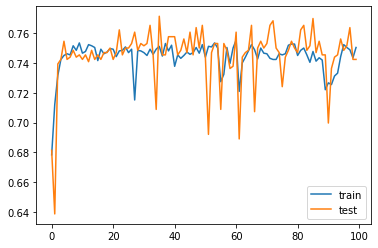

In [17]:
#Training the model with this ORCHESTRATED DATASET,
##ONLY normal way of prediction
##With regularization and with precision and accuracy scores, classification report.and plots
import matplotlib
from matplotlib import pyplot

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1L2

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
"""
Now, we Set up the logistic regression model with y_labels1 and  y_valid_labels1, the changed labels
"""
model = Sequential()
feature_vector=new_X_tr[1] #(any row of training data set)
model.add(Dense(2,  # output dim is 2, one score per each class
                activation='softmax',
                kernel_regularizer=L1L2(l1=0.0, l2=0.1),
                input_dim=len(feature_vector)))  # input dimension = number of features your data has
          

model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(new_X_tr, y_tr_labels, epochs=100, validation_data=(new_X_valid, y_valid_labels))


y_pred = model.predict(new_X_valid, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print("\n Classification Report, \n", classification_report(new_y_valid, y_pred_bool), "\n")
print("\n Macro scores = \n")
print(precision_recall_fscore_support(new_y_valid, y_pred_bool, average='macro')) #computes accuracy for each label and then averages them, Doesn't take class imbalance into account

print("\n Micro Scores = \n")
print(precision_recall_fscore_support(new_y_valid, y_pred_bool, average='micro')) #computes accuracy at global level, not for each label.

print("\n weighted Scores = \n")
print(precision_recall_fscore_support(new_y_valid, y_pred_bool, average='weighted'))#computes accuracy for each label and then does weighted average of them, considers support of each label





pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()